# FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am going to analyze the Gun Background Check data provided by FBI and US Census Data. 
I will be exploring the data to answer questions:

* Which states have had the highest growth in gun registrations?
* What census data is most associated with high gun per capita?

**Notes On Data**
The Gun Background Check data provided by FBA represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale. (Ref: https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)

So the results of this analysis may differ from the result of analysis done by actual number of gun registrations instead of background checks. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Load FBI's National Instant Criminal Background Check System Data 
It contains the number of firearm checks by month, state, and type.

###### Load U.S. Census Data
It contains several variables at the state level.

In [2]:
# Load Gun Background Check Data
df_gun = pd.read_csv('data/gun-data.csv')
# Load US Census Data
df_census = pd.read_csv('data/us-census-data.csv')

df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

<a id='wrangling'></a>
## Data Wrangling

###### The Result of Data Wrangling, both Gun Background Check Data and US Census Data will have
1. Columns with only data used for analysis
2. setting 'state' as index

### Gun Background Check Data Wrangling

###### Dropping rows of data I will not be using.
Rows Kept from Gun Data
* Row 0  - month                        
* Row 1  - state      
* Row 2  - permit                       
* Row 3  - permit_recheck               
* Row 4  - handgun                      
* Row 5  - long_gun                     
* Row 26 - totals                       

In [3]:
# Dropping rows which will not be used.
# The rows kept are listed above.
df_gun = df_gun.drop(['other','multiple', 'admin', 
    'redemption_handgun', 'redemption_long_gun',
    'redemption_other','prepawn_handgun', 'prepawn_long_gun',
    'prepawn_other', 'returned_handgun', 'returned_long_gun',
    'returned_other', 'rentals_handgun', 'rentals_long_gun',
    'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
    'return_to_seller_handgun', 'return_to_seller_long_gun',
    'return_to_seller_other'], axis=1)

df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
month             12485 non-null object
state             12485 non-null object
permit            12461 non-null float64
permit_recheck    1100 non-null float64
handgun           12465 non-null float64
long_gun          12466 non-null float64
totals            12485 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 682.9+ KB


###### Setting state as index.

In [4]:
# Setting state as index.
df_gun.set_index('state',inplace=True)
df_gun.head()

,month,permit,permit_recheck,handgun,long_gun,totals
state,,,,,,
Alabama,2017-09,16717.0,0.0,5734.0,6320.0,32019
Alaska,2017-09,209.0,2.0,2320.0,2930.0,6303
Arizona,2017-09,5069.0,382.0,11063.0,7946.0,28394
Arkansas,2017-09,2935.0,632.0,4347.0,6063.0,17747
California,2017-09,57839.0,0.0,37165.0,24581.0,123506


### US Census Data Wrangling

By looking at results of info() and head(), it seems like actual sample data is 65.  
But Fact column contains extra rows (some note). 
Also Fact Note column seems to be optional field.

In [5]:
# Looking at df_cencus dataframe info and first few rows of data to see if there is any wrangling needs to be done.
df_census.info()
df_census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Looking at the result of tail() confirms last rows of Fact column contains some note rather than actual data.

In [6]:
# Looking at last few rows of data to see if there is any wrangling needs to be done.
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Dropping last 20 rows as they are not actual data.

In [7]:
# Dropping note section of data which are not actual data.
df_census = df_census[:65]
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


###### Dropping Fact Note Column.

In [8]:
# Dropping the row of data which will not be used.
df_census = df_census.drop(['Fact Note'], axis=1)

###### Dropping the following rows (Fact) from US Census Data which don't provide much relationship to my data analysis.

###### These 23 following Facts will be kept for Analysis.
* row 0  - Population estimates, July 1, 2016,  (V2016)
* row 2  - Population, percent change April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
* row 4  - Persons under 5 years, percent, July 1, 2016,  (V2016)
* row 5  - Persons under 5 years, percent, April 1, 2010
* row 6  - Persons under 18 years, percent, July 1, 2016,  (V2016)
* row 7  - Persons under 18 years, percent, April 1, 2010
* row 8  - Persons 65 years and over, percent,  July 1, 2016,  (V2016)
* row 9  - Persons 65 years and over, percent, April 1, 2010
* row 10 -  Female persons, percent,  July 1, 2016,  (V2016)
* row 11 -  Female persons, percent, April 1, 2010
* row 12 -  White alone, percent, July 1, 2016,  (V2016)
* row 13 -  Black or African American alone, percent, July 1, 2016,  (V2016)
* row 14 -  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
* row 15 -  Asian alone, percent, July 1, 2016,  (V2016)
* row 16 -  Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
* row 17 -  Two or More Races, percent, July 1, 2016,  (V2016)
* row 18 -  Hispanic or Latino, percent, July 1, 2016,  (V2016)
* row 20 -  Veterans, 2011-2015
* row 28 -  Median gross rent, 2011-2015
* row 34 -  High school graduate or higher, percent of persons age 25 years+, 2011-2015
* row 35 -  Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
* row 47 -  Median household income (in 2015 dollars), 2011-2015
* row 49 -  Persons in poverty, percent
* row 51 -  Total employment, 2015
* row 62 -  Population per square mile, 2010

In [9]:
# Dropping the rows of data which will not be used.
# Rows kept are listed above.
df_census = df_census.iloc[np.r_[0,2,4:19,20,28,34,35,47,49, 51, 62]]
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
11,"Female persons, percent, April 1, 2010",51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%


###### Setting Fact as columns and state as index.

In [10]:
# Detting Fact as columns, and state as index. 
df_census.set_index('Fact',inplace=True)
df_census = df_census.transpose()
df_census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010",...,"Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Median gross rent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Population per square mile, 2010"
Alabama,"4,863,300",1.70%,6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,...,1.60%,4.20%,"363,170",$717,84.30%,23.50%,"$43,623",17.10%,"1,634,391",94.4
Alaska,"741,894",4.50%,7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,...,7.30%,7.00%,"69,323","$1,146",92.10%,28.00%,"$72,515",9.90%,"267,999",1.2
Arizona,"6,931,071",8.40%,6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%,...,2.80%,30.90%,"505,794",$913,86.00%,27.50%,"$50,255",16.40%,"2,295,186",56.3
Arkansas,"2,988,248",2.50%,6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%,...,2.00%,7.30%,"220,953",$677,84.80%,21.10%,"$41,371",17.20%,"1,003,113",56
California,"39,250,017",5.40%,6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%,...,3.80%,38.90%,"1,777,410","$1,255",81.80%,31.40%,"$61,818",14.30%,"14,325,377",239.1


###### Renaming columns for easier access.

In [11]:
#Renaming columns to get rid of spaces for easiler access.
column_rename = {
    'Population estimates, July 1, 2016,  (V2016)' : 'population_estimates',
    'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)' : 'population_change',
    'Persons under 5 years, percent, July 1, 2016,  (V2016)' : 'under_5_2016',
    'Persons under 5 years, percent, April 1, 2010' : 'under_5_2010',
    'Persons under 18 years, percent, July 1, 2016,  (V2016)' : 'under_18_2016',
    'Persons under 18 years, percent, April 1, 2010' : 'under_18_2010',
    'Persons 65 years and over, percent,  July 1, 2016,  (V2016)' : 'over_65_2016',
    'Persons 65 years and over, percent, April 1, 2010' : 'over_65_2010',
    'Female persons, percent,  July 1, 2016,  (V2016)' : 'female_2016',
    'Female persons, percent, April 1, 2010' : 'female_2010',
    'White alone, percent, July 1, 2016,  (V2016)' : 'white',
    'Black or African American alone, percent, July 1, 2016,  (V2016)' : 'black',
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)' : 'native_indian',
    'Asian alone, percent, July 1, 2016,  (V2016)' : 'asian',
    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)' : 'pacific_islander',
    'Two or More Races, percent, July 1, 2016,  (V2016)' : 'mixed',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)' : 'hispanic',
    'Veterans, 2011-2015' : 'veterans',
    'Median gross rent, 2011-2015' : 'median_rent',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015' : 'high_school_grad',
    'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015' : 'college_grad',
    'Median household income (in 2015 dollars), 2011-2015' : 'median_household_income',
    'Persons in poverty, percent' : 'poverty',
    'Total employment, 2015' : 'employment',
    'Population per square mile, 2010' : 'population_sq_mile'
}


df_census = df_census.rename(columns = column_rename)
df_census.head()

Fact,population_estimates,population_change,under_5_2016,under_5_2010,under_18_2016,under_18_2010,over_65_2016,over_65_2010,female_2016,female_2010,...,mixed,hispanic,veterans,median_rent,high_school_grad,college_grad,median_household_income,poverty,employment,population_sq_mile
Alabama,"4,863,300",1.70%,6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,...,1.60%,4.20%,"363,170",$717,84.30%,23.50%,"$43,623",17.10%,"1,634,391",94.4
Alaska,"741,894",4.50%,7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,...,7.30%,7.00%,"69,323","$1,146",92.10%,28.00%,"$72,515",9.90%,"267,999",1.2
Arizona,"6,931,071",8.40%,6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%,...,2.80%,30.90%,"505,794",$913,86.00%,27.50%,"$50,255",16.40%,"2,295,186",56.3
Arkansas,"2,988,248",2.50%,6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%,...,2.00%,7.30%,"220,953",$677,84.80%,21.10%,"$41,371",17.20%,"1,003,113",56
California,"39,250,017",5.40%,6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%,...,3.80%,38.90%,"1,777,410","$1,255",81.80%,31.40%,"$61,818",14.30%,"14,325,377",239.1


## Data Cleaning

###### Data Cleaning Steps
1. Check if there is any missing data.
2. Fill the missing data with appropriate value.
4. Change any data which does match with rest of fields, ex letter to number, format, etc. 
3. Check if data types are correct and convert them to appropriate data type.

### Gun Background Check Data Cleaning

###### Check to see if any data is missing. 

In [12]:
# Checking if there is any data missing
df_gun.isnull().sum().any()

True

In [13]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 6 columns):
month             12485 non-null object
permit            12461 non-null float64
permit_recheck    1100 non-null float64
handgun           12465 non-null float64
long_gun          12466 non-null float64
totals            12485 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 682.8+ KB


###### Some of handgun and long_gun are missing.
Since I would be using these numbers for addition and subtraction (finding total or difference), 
it doesn't make sense to fill them with mean or some other speculated data.  
I will fill these missing values with 0.

In [14]:
# Filling NA field with 0.
df_gun['permit'] = df_gun['permit'].fillna(0)
df_gun['permit_recheck'] = df_gun['permit_recheck'].fillna(0)
df_gun['handgun'] = df_gun['handgun'].fillna(0)
df_gun['long_gun'] = df_gun['long_gun'].fillna(0)

###### There are no more missing Gun Background Check data.

In [15]:
# Checking if filling NA value with 0 was successful.
df_gun.isnull().sum().any()

False

###### Check if data types are correct.

In [16]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 6 columns):
month             12485 non-null object
permit            12485 non-null float64
permit_recheck    12485 non-null float64
handgun           12485 non-null float64
long_gun          12485 non-null float64
totals            12485 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 682.8+ KB


###### Now data types are correct for Gun Background Check Data.

### US Census Data Cleaning

###### Check to see if any data is missing.  There are no missing US Census data.

In [17]:
# Checking to see if there is any data missing.
df_census.isnull().sum().any() 

False

###### By looking at US Census Data closely, I found out the 'pacific_islander' column contains letter 'Z'. 
When converting 'pacific_islander' column to float data type later,
it gave an error first time I ran the following code.<br/>
df_census['pacific_islander'] = df_census['pacific_islander'].str.extract('([0-9.]+)', expand=False).astype(float)

In [18]:
# Checking to see what are unique values of 'pacific_islander' column to make sure it only contains some type of numeric value.
df_census['pacific_islander'].value_counts()

0.10%     24
0.001      8
Z          4
0.002      3
0.20%      2
0.80%      2
0.30%      2
1.00%      1
0.004      1
1.30%      1
0.50%      1
10.20%     1
Name: pacific_islander, dtype: int64

###### 'Z' means 'Value greater than zero but less than half unit of measure shown'. I will replace 'Z' will with 0.

In [19]:
# Replacing letter 'Z' with 0, and checking to see if all unique values are some type of numeric value.
df_census['pacific_islander'][df_census['pacific_islander'] == 'Z'] = '0'
df_census['pacific_islander'].value_counts()

0.10%     24
0.001      8
0          4
0.002      3
0.20%      2
0.30%      2
0.80%      2
1.00%      1
0.004      1
1.30%      1
0.50%      1
10.20%     1
Name: pacific_islander, dtype: int64

###### Check if data types are correct.

In [20]:
# Checking to see if data types are correct.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 25 columns):
population_estimates       50 non-null object
population_change          50 non-null object
under_5_2016               50 non-null object
under_5_2010               50 non-null object
under_18_2016              50 non-null object
under_18_2010              50 non-null object
over_65_2016               50 non-null object
over_65_2010               50 non-null object
female_2016                50 non-null object
female_2010                50 non-null object
white                      50 non-null object
black                      50 non-null object
native_indian              50 non-null object
asian                      50 non-null object
pacific_islander           50 non-null object
mixed                      50 non-null object
hispanic                   50 non-null object
veterans                   50 non-null object
median_rent                50 non-null object
high_school_grad 

###### Check to see if what is the actual data type for columns with 'object'. 
I didn't list every single columns with 'object', but ran the following code for all.
They are all 'string' data type.

In [21]:
# All columns have data type 'object'.
# Checking to see what is the data type of 'population_estimates' column.
type(df_census['population_estimates'][0])

str

###### Extract integer from string and covert them to appropriate data type - int or float.

In [22]:
# Defining function to extract numeric and decimal points from string and change the data type to float.
def change_to_float(x):
    return x.str.extract('([0-9.\-]+)', expand=False).astype(float)

# Columns need to be changed to float.
float_columns = [
    'population_change',
    'under_5_2016',
    'under_5_2010',
    'under_18_2016',
    'under_18_2010',
    'over_65_2016',
    'over_65_2010',
    'female_2016',
    'female_2010',
    'white',
    'black',
    'native_indian',
    'asian',
    'pacific_islander',
    'mixed',
    'hispanic',
    'high_school_grad',
    'college_grad',
    'poverty',
    'population_sq_mile'
]

# Sorting float_column since intersectld() returns sorted columns.  This ensure the result of apply() will be updated in correct columns.
float_columns.sort()

# Update the columns which were converted to float data type.
# I'd rather just do df_census.update(df_census.loc[:,float_columns].apply(change_to_float, axis=1))
# But there is a bug where update() does not preserve the data type and change it to 'object'
# https://github.com/pandas-dev/pandas/issues/4094
# Using intersect1d() instead.
df_census[np.intersect1d(df_census.columns, float_columns)] = df_census.loc[:,float_columns].apply(change_to_float, axis=1)
df_census.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 25 columns):
population_estimates       50 non-null object
population_change          50 non-null float64
under_5_2016               50 non-null float64
under_5_2010               50 non-null float64
under_18_2016              50 non-null float64
under_18_2010              50 non-null float64
over_65_2016               50 non-null float64
over_65_2010               50 non-null float64
female_2016                50 non-null float64
female_2010                50 non-null float64
white                      50 non-null float64
black                      50 non-null float64
native_indian              50 non-null float64
asian                      50 non-null float64
pacific_islander           50 non-null float64
mixed                      50 non-null float64
hispanic                   50 non-null float64
veterans                   50 non-null object
median_rent                50 non-null object
h

In [23]:
# Defining a function to remove non-numeric characters and convert it to int.
def change_to_int(x):
    x
    return x.str.replace('[$,]','').astype(int)

# Columns needs to be changed to int.
int_columns = [
    'population_estimates',
    'veterans',
    'median_rent',
    'median_household_income',
    'employment'
]

# Sorting int_column since intersectld() returns sorted columns.  This ensure the result of apply() will be updated in correct columns.
int_columns.sort()

# Update the columns which were converted to float data type.
# I'd rather just do df_census.update(df_census.loc[:,float_columns].apply(change_to_float, axis=1))
# But there is a bug where update() does not preserve the data type and change it to 'object'
# https://github.com/pandas-dev/pandas/issues/4094
# Using intersect1d() instead.
df_census[np.intersect1d(df_census.columns, int_columns)] = df_census.loc[:,int_columns].apply(change_to_int, axis=1)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 25 columns):
population_estimates       50 non-null int32
population_change          50 non-null float64
under_5_2016               50 non-null float64
under_5_2010               50 non-null float64
under_18_2016              50 non-null float64
under_18_2010              50 non-null float64
over_65_2016               50 non-null float64
over_65_2010               50 non-null float64
female_2016                50 non-null float64
female_2010                50 non-null float64
white                      50 non-null float64
black                      50 non-null float64
native_indian              50 non-null float64
asian                      50 non-null float64
pacific_islander           50 non-null float64
mixed                      50 non-null float64
hispanic                   50 non-null float64
veterans                   50 non-null int32
median_rent                50 non-null int32
high

In [24]:
# Make sure data look correct after data type conversion.
df_census

Fact,population_estimates,population_change,under_5_2016,under_5_2010,under_18_2016,under_18_2010,over_65_2016,over_65_2010,female_2016,female_2010,...,mixed,hispanic,veterans,median_rent,high_school_grad,college_grad,median_household_income,poverty,employment,population_sq_mile
Alabama,4863300,1.700,6.000,6.400,22.600,23.700,16.100,13.800,51.600,51.500,...,1.600,4.200,363170,717,84.300,23.500,43623,17.100,1634391,94.4
Alaska,741894,4.500,7.300,7.600,25.200,26.400,10.400,7.700,47.700,48.000,...,7.300,7.000,69323,1146,92.100,28.000,72515,9.900,267999,1.2
Arizona,6931071,8.400,6.300,7.100,23.500,25.500,16.900,13.800,50.300,50.300,...,2.800,30.900,505794,913,86.000,27.500,50255,16.400,2295186,56.3
Arkansas,2988248,2.500,6.400,6.800,23.600,24.400,16.300,14.400,50.900,50.900,...,2.000,7.300,220953,677,84.800,21.100,41371,17.200,1003113,56.0
California,39250017,5.400,6.300,6.800,23.200,25.000,13.600,11.400,50.300,50.300,...,3.800,38.900,1777410,1255,81.800,31.400,61818,14.300,14325377,239.1
Colorado,5540545,10.200,6.100,6.800,22.800,24.400,13.400,10.900,49.700,49.900,...,3.000,21.300,391725,1002,90.700,38.100,60629,11.000,2253795,48.5
Connecticut,3576452,0.100,5.200,5.700,21.100,22.900,16.100,14.200,51.200,51.300,...,2.300,15.700,199331,1075,89.900,37.600,70331,9.800,1503102,738.1
Delaware,952065,6.000,5.800,6.200,21.500,22.900,17.500,14.400,51.600,51.600,...,2.600,9.200,71213,1018,88.400,30.000,60509,11.700,397385,460.8
Florida,20612439,9.600,5.500,5.700,20.100,21.300,19.900,17.300,51.100,51.100,...,2.100,24.900,1507738,1002,86.900,27.300,47507,14.700,7777990,350.6
Georgia,10310371,6.400,6.400,7.100,24.400,25.700,13.100,10.700,51.300,51.200,...,2.100,9.400,670617,879,85.400,28.800,49620,16.000,3692490,168.4


###### Now data types are correct for US Census Data.



###### Data for the following states are in "percentage" format.
ex. 87.9% instead of 0.879<br/>
They need to be divided by 100 to make the data consistent with rest.

Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, <br/>
Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, <br/>
Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, <br/>
New Jersey, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming

In [25]:
# States that needs to be changed the format from percent to decimals.  ex. 89.7% -> 0.897
modify_format_states = [
'Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming'
]

df_census.loc[modify_format_states,:]

# Columns where format needs to be changed from percent to decimals.
modify_format_columns = [
    'population_change',
    'under_5_2016',
    'under_5_2010',
    'under_18_2016',
    'under_18_2010',
    'over_65_2016',
    'over_65_2010',
    'female_2016',
    'female_2010',
    'white',
    'black',
    'native_indian',
    'asian',
    'pacific_islander',
    'mixed',
    'hispanic',
    'high_school_grad',
    'college_grad',
    'poverty',
]

In [26]:
# Dividing value in percent format by 100 to make it to decimals.
df_census_format_changed = df_census.loc[modify_format_states,:][modify_format_columns]/100
df_census.update(df_census_format_changed)

# Make sure data looks correct after format change.
df_census

Fact,population_estimates,population_change,under_5_2016,under_5_2010,under_18_2016,under_18_2010,over_65_2016,over_65_2010,female_2016,female_2010,...,mixed,hispanic,veterans,median_rent,high_school_grad,college_grad,median_household_income,poverty,employment,population_sq_mile
Alabama,4863300,0.017,0.060,0.064,0.226,0.237,0.161,0.138,0.516,0.515,...,0.016,0.042,363170,717,0.843,0.235,43623,0.171,1634391,94.4
Alaska,741894,0.045,0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.480,...,0.073,0.070,69323,1146,0.921,0.280,72515,0.099,267999,1.2
Arizona,6931071,0.084,0.063,0.071,0.235,0.255,0.169,0.138,0.503,0.503,...,0.028,0.309,505794,913,0.860,0.275,50255,0.164,2295186,56.3
Arkansas,2988248,0.025,0.064,0.068,0.236,0.244,0.163,0.144,0.509,0.509,...,0.020,0.073,220953,677,0.848,0.211,41371,0.172,1003113,56.0
California,39250017,0.054,0.063,0.068,0.232,0.250,0.136,0.114,0.503,0.503,...,0.038,0.389,1777410,1255,0.818,0.314,61818,0.143,14325377,239.1
Colorado,5540545,0.102,0.061,0.068,0.228,0.244,0.134,0.109,0.497,0.499,...,0.030,0.213,391725,1002,0.907,0.381,60629,0.110,2253795,48.5
Connecticut,3576452,0.001,0.052,0.057,0.211,0.229,0.161,0.142,0.512,0.513,...,0.023,0.157,199331,1075,0.899,0.376,70331,0.098,1503102,738.1
Delaware,952065,0.060,0.058,0.062,0.215,0.229,0.175,0.144,0.516,0.516,...,0.026,0.092,71213,1018,0.884,0.300,60509,0.117,397385,460.8
Florida,20612439,0.096,0.055,0.057,0.201,0.213,0.199,0.173,0.511,0.511,...,0.021,0.249,1507738,1002,0.869,0.273,47507,0.147,7777990,350.6
Georgia,10310371,0.064,0.064,0.071,0.244,0.257,0.131,0.107,0.513,0.512,...,0.021,0.094,670617,879,0.854,0.288,49620,0.160,3692490,168.4


<a id='eda'></a>
## Exploratory Data Analysis

### Which states have had the highest growth in gun registrations?

###### Calculating 'growth' by subtracting 1998-11 total number of background checks from 2017-09.

In [27]:
# Calculating 'growth' by subtracting 1998-11 total number of background checks from 2017-09:

# For total number of background checks.
totals = df_gun[df_gun['month'] == '2017-09']['totals'] - df_gun[df_gun['month'] == '1998-11']['totals'] 

df_gun_growth = pd.DataFrame(data = totals)
# For handguns
df_gun_growth['handgun'] = df_gun[df_gun['month'] == '2017-09']['handgun'] - df_gun[df_gun['month'] == '1998-11']['handgun'] 
# For long guns
df_gun_growth['long_gun'] = df_gun[df_gun['month'] == '2017-09']['long_gun'] - df_gun[df_gun['month'] == '1998-11']['long_gun']

# Display some statistics for these new columns.
df_gun_growth.describe()

,totals,handgun,long_gun
count,55.000000,55.000000,55.000000
mean,33382.727273,8567.690909,7370.836364
std,57950.996592,10130.893995,6861.961875
min,9.000000,0.000000,-1.000000
25%,7235.500000,1706.000000,2621.500000
50%,16707.000000,4815.000000,5544.000000
75%,36218.500000,10904.500000,11187.500000
max,397866.000000,39820.000000,38067.000000


###### Combining US Gun Background Check data and US Census data.

In [28]:
# Join US Gun Background Check data and US Census data.
df_combined = df_gun_growth.join(df_census, how='inner')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 28 columns):
totals                     50 non-null int64
handgun                    50 non-null float64
long_gun                   50 non-null float64
population_estimates       50 non-null int32
population_change          50 non-null float64
under_5_2016               50 non-null float64
under_5_2010               50 non-null float64
under_18_2016              50 non-null float64
under_18_2010              50 non-null float64
over_65_2016               50 non-null float64
over_65_2010               50 non-null float64
female_2016                50 non-null float64
female_2010                50 non-null float64
white                      50 non-null float64
black                      50 non-null float64
native_indian              50 non-null float64
asian                      50 non-null float64
pacific_islander           50 non-null float64
mixed                      50 non-null float64
hi

###### Finding top 10 states for Gun Background Check Growth.

In [29]:
# Sorting 'totals' number of background check in descending order and slicing first 10 rows of data.
df_gun_top_growth = df_combined.sort_values(by=['totals'], ascending=False)[:10]
df_gun_top_growth

,totals,handgun,long_gun,population_estimates,population_change,under_5_2016,under_5_2010,under_18_2016,under_18_2010,over_65_2016,...,mixed,hispanic,veterans,median_rent,high_school_grad,college_grad,median_household_income,poverty,employment,population_sq_mile
Kentucky,397866,7744.0,7081.0,4436974,0.022,0.062,0.065,0.228,0.236,0.156,...,0.019,0.035,297312,675,0.842,0.223,43740,0.185,1579477,109.9
Texas,125466,37735.0,38067.0,27862596,0.108,0.072,0.077,0.262,0.273,0.120,...,0.019,0.391,1539655,882,0.819,0.276,53207,0.156,10239710,96.3
California,121405,36448.0,23631.0,39250017,0.054,0.063,0.068,0.232,0.250,0.136,...,0.038,0.389,1777410,1255,0.818,0.314,61818,0.143,14325377,239.1
Illinois,116427,18290.0,10183.0,12801539,-0.002,0.060,0.065,0.229,0.244,0.146,...,0.019,0.170,668933,907,0.879,0.323,57574,0.130,5427549,231.1
Pennsylvania,76986,39820.0,13214.0,12784227,0.006,0.056,0.057,0.209,0.220,0.174,...,0.019,0.070,870770,840,0.892,0.286,53599,0.129,5306896,283.9
Florida,76578,38880.0,17506.0,20612439,0.096,0.055,0.057,0.201,0.213,0.199,...,0.021,0.249,1507738,1002,0.869,0.273,47507,0.147,7777990,350.6
Tennessee,50838,19200.0,13661.0,6651194,0.048,0.061,0.064,0.226,0.236,0.157,...,0.019,0.052,462414,764,0.855,0.249,45219,0.158,2507205,153.9
Ohio,48990,20583.0,14564.0,11614373,0.007,0.060,0.062,0.225,0.237,0.162,...,0.022,0.037,806531,730,0.891,0.261,49429,0.146,4719985,282.3
Indiana,48177,15968.0,11113.0,6633053,0.023,0.064,0.067,0.238,0.248,0.149,...,0.020,0.068,426493,745,0.878,0.241,49255,0.141,2660503,181.0
Minnesota,44233,4835.0,12397.0,5519952,0.041,0.064,0.067,0.233,0.242,0.151,...,0.024,0.052,342388,848,0.924,0.337,61492,0.099,2612314,66.6


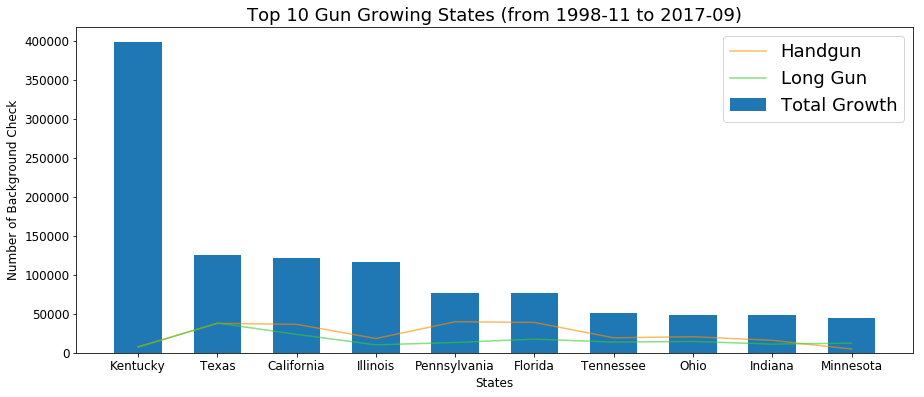

In [30]:
# Visualization
plt.figure(figsize=(15,6))
idx = df_gun_top_growth.index
pos = np.arange(len(idx))

plt.title('Top 10 Gun Growing States (from 1998-11 to 2017-09)', fontsize=18)
plt.xlabel('States', fontsize=12)
plt.xticks(pos, idx)
plt.tick_params(labelsize=12)
plt.ylabel('Number of Background Check', fontsize=12)

plt.bar(pos, df_gun_top_growth['totals'], width=0.6, align='center', label='Total Growth')
plt.plot(pos, df_gun_top_growth['handgun'], alpha=0.6, color='darkorange', label='Handgun')
plt.plot(pos, df_gun_top_growth['long_gun'], alpha=0.6, color='limegreen', label='Long Gun')

plt.legend(fontsize=18)

###### Kentucky has the higest growth by far and almost 3 times more in total number of gun back ground checks.

###### However, when it comes to hand guns and long guns, Pennsylvania and Texas has the highest growth, respectively.  Kentucky had a lot of number of background check in permits.

###### I want to find out how top 10 states for gun growth per capita may differ since Illinois and Pennsylania have 1/3 of California population.

###### Finding top States for Gun Background Check Growth Per Capita.

In [31]:
# Calculating per capita.
df_per_capita = df_combined['totals']/df_combined['population_estimates']

# Sorting per capita in descending order and slicing first 10 rows of data.
df_gun_top_per_capita = df_per_capita.sort_values(ascending=False)[:10]
df_gun_top_per_capita

Kentucky         0.089671
Montana          0.009671
Illinois         0.009095
West Virginia    0.008910
Idaho            0.008771
South Dakota     0.008531
Alaska           0.008300
Minnesota        0.008013
New Hampshire    0.007967
Tennessee        0.007643
dtype: float64

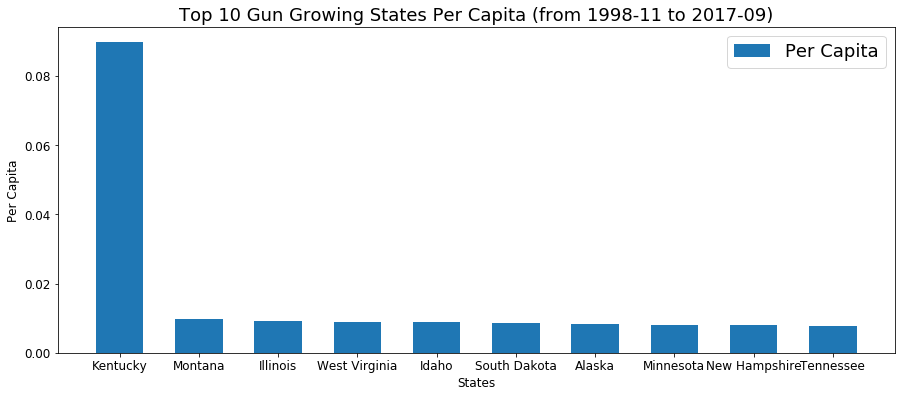

In [32]:
# Visualization
fig = plt.figure(figsize=(15,6))
idx = df_gun_top_per_capita.index
pos = np.arange(len(idx))

plt.title('Top 10 Gun Growing States Per Capita (from 1998-11 to 2017-09)', fontsize=18)
plt.xlabel('States', fontsize=12)
plt.xticks(pos, idx)
plt.tick_params(labelsize=12)
plt.ylabel('Per Capita', fontsize=12)

plt.bar(pos, df_gun_top_per_capita, width=0.6, align='center', label='Per Capita')
plt.legend(fontsize=18)

###### Again, Kentucky has the highest growth per capita by far.  Montana wasn't in the top 10 states for gun growth, but it is the second highest per capita.  Illinois, Minnesota, and Tennessee remained in this list, but rest of states are different from top 10 states for gun growth. 

###### I want to find out how top 10 states for gun growth by population may differ since Montana, Idaho, South Dakota, or Alaska do not seem like large population growth rate.

###### Finding top 10 States for Gun Background Check Growth By Population Growth Rate.

In [33]:
# Calculating population growth.
df_by_population_growth = df_combined['totals'] / df_combined['population_change']

# Sorting population growth in descending order and slicing first 10 rows of data.
df_gun_top_by_population_growth = df_by_population_growth.sort_values(ascending=False)[:10]
df_gun_top_by_population_growth

Kentucky        1.808482e+07
Pennsylvania    1.283100e+07
Connecticut     1.203700e+07
Michigan        8.979750e+06
Ohio            6.998571e+06
Maine           4.307500e+06
Mississippi     2.386714e+06
Wisconsin       2.329062e+06
California      2.248241e+06
Missouri        2.176059e+06
dtype: float64

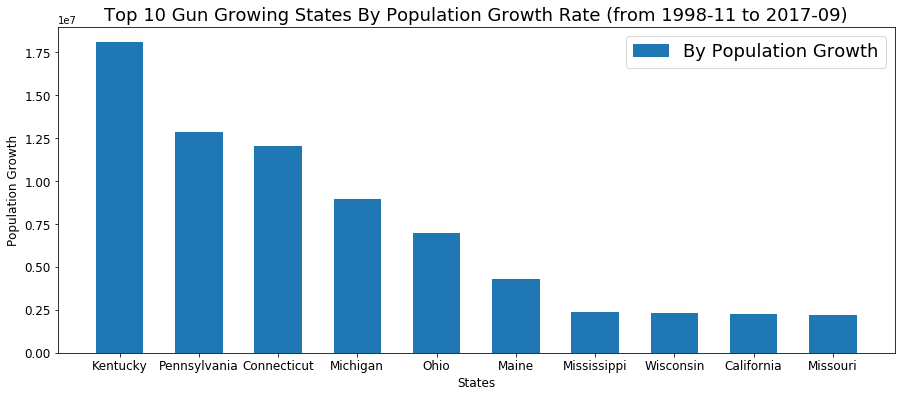

In [34]:
# Visualization
fig = plt.figure(figsize=(15,6))
idx = df_gun_top_by_population_growth.index
pos = np.arange(len(idx))

plt.title('Top 10 Gun Growing States By Population Growth Rate (from 1998-11 to 2017-09)', fontsize=18)
plt.xlabel('States', fontsize=12)
plt.xticks(pos, idx)
plt.tick_params(labelsize=12)
plt.ylabel('Population Growth', fontsize=12)

plt.bar(pos, df_gun_top_by_population_growth, width=0.6, align='center', label='By Population Growth')
plt.legend(fontsize=18)

###### Kentucky has the highest gun growth by population growth rate.  Texas and California which were number 2 and 3 in gun growth by total number of back ground checks, but they don't seem to be affected by population growth rate.

###### Lastly, I want to look at Gun Background Check Growth By Poverty Rate.

###### Finding top States for Gun Background Check Growth By Poverty Rate

In [35]:
# Calculating poverty rate.
df_by_poverty_rate = df_combined['totals'] / df_combined['poverty']

# Sorting poverty rate in descending order and slicing first 10 rows of data.
df_gun_top_by_poverty_rate = df_by_poverty_rate.sort_values(ascending=False)[:10]
df_gun_top_by_poverty_rate

Kentucky        2.150627e+06
Illinois        8.955923e+05
California      8.489860e+05
Texas           8.042692e+05
Pennsylvania    5.967907e+05
Florida         5.209388e+05
Minnesota       4.467980e+05
Washington      3.777699e+05
Indiana         3.416809e+05
Ohio            3.355479e+05
dtype: float64

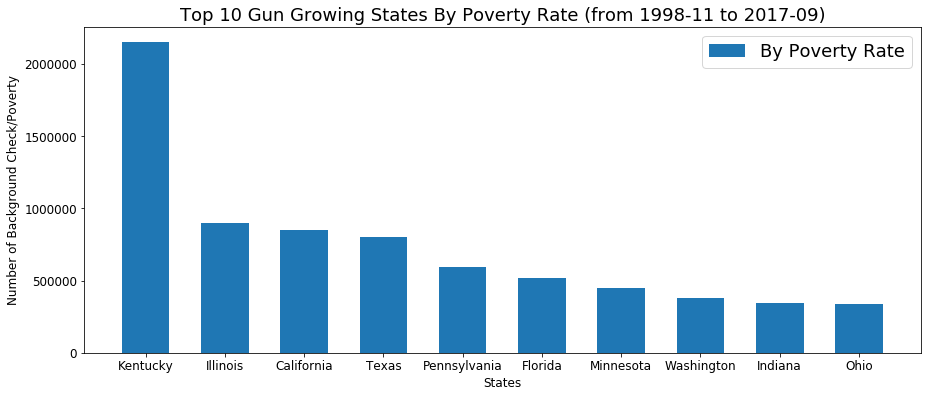

In [36]:
# Visualization
fig = plt.figure(figsize=(15,6))
idx = df_gun_top_by_poverty_rate.index
pos = np.arange(len(idx))

plt.title('Top 10 Gun Growing States By Poverty Rate (from 1998-11 to 2017-09)', fontsize=18)
plt.xlabel('States', fontsize=12)
plt.xticks(pos, idx)
plt.tick_params(labelsize=12)
plt.ylabel('Number of Background Check/Poverty', fontsize=12)

plt.bar(pos, df_gun_top_by_poverty_rate, width=0.6, align='center', label='By Poverty Rate')
plt.legend(fontsize=18)

###### Again, Kentucky has the highest growth by far by poverty rate.  Washington state first appear in this chart.  Total number of background check doesn't seem to be a lot for Washington, but its growth is associated with poverty rate.


### What census data is most associated with high gun per capita? 

###### I will look at relationship between high gun per capita and 
* Population
* Population Growth
* Adult Population
* Non-White Population
* Population Per Square Mile
* Poverty Rate
* High School Graduation Rate
* Median Rent
* Employment Rate

I will first look at some population related data and see if any of them are associated with high gun per capita.<br/>
Then I will look at social/economic related data.

In [37]:
# Calculating per capita
df_combined['per_capita'] = df_combined['totals']/df_combined['population_estimates']
#df_combined['per_capita'] = df_combined['per_capita'].astype(float)

# Calculating adult population
adult_population_percent = 1 - (df_combined['under_5_2016'] + df_combined['under_18_2016'] + df_combined['over_65_2016'])
df_combined['adult_population'] = (adult_population_percent * df_combined['population_estimates']) / df_combined['population_estimates']

# Calculating non-white population
df_combined['non_white_population'] = ((1 - df_combined['white']) * df_combined['population_estimates']) / df_combined['population_estimates']

# Calculating employment rate
df_combined['employment_rate'] = df_combined['employment']/df_combined['population_estimates']

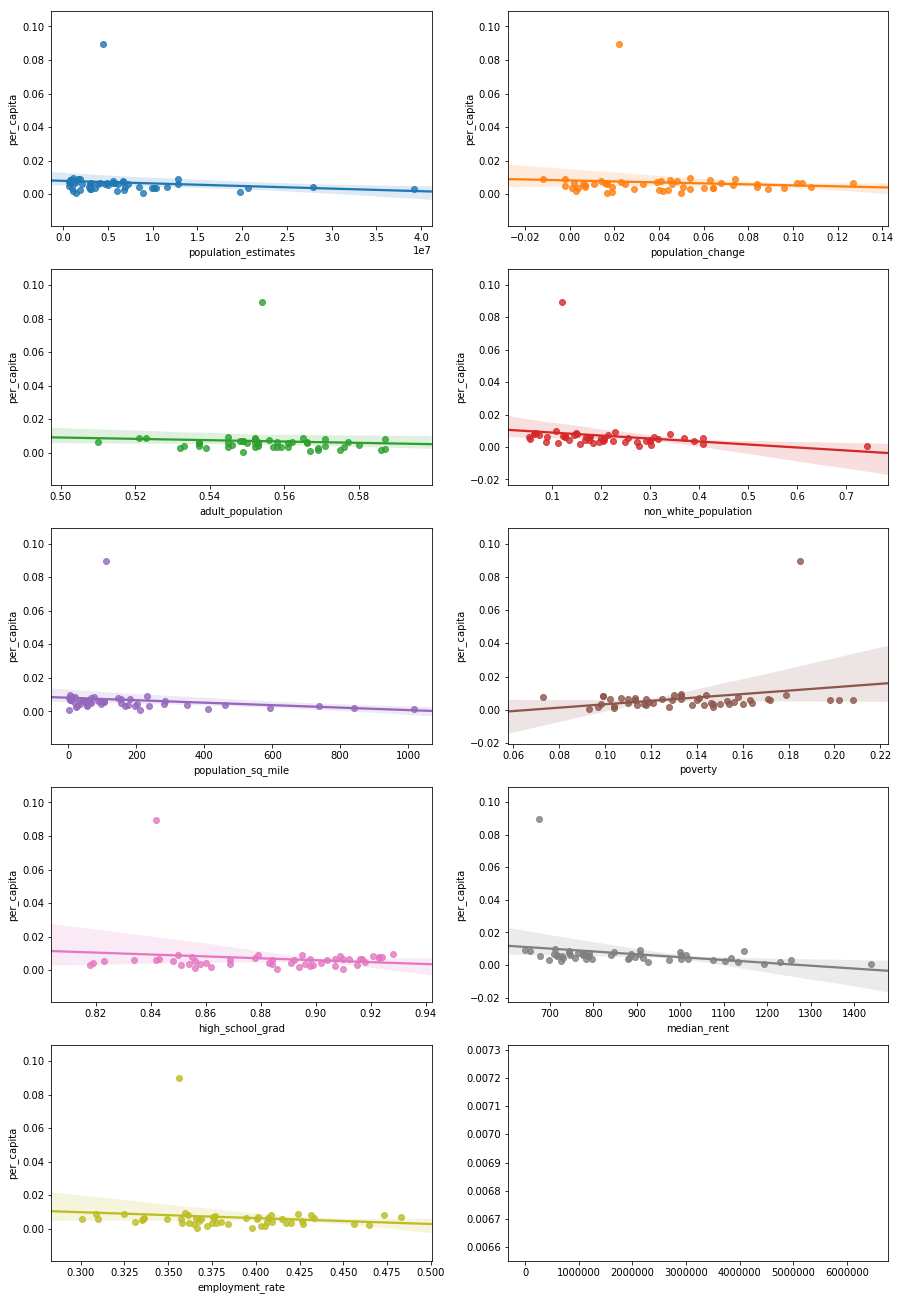

In [38]:
# Creating 5x2 subplots
fig, ax = plt.subplots(5,2,figsize=(15,23))

# Defining a function to plot scatter plot for gun capita
def plot_gun_capita(x, row, col):
    return sns.regplot(
        x=x,
        y='per_capita',
        data=df_combined,
        ax=ax[row][col]
    )

# Plotting population related data
plot_gun_capita('population_estimates', 0, 0)
plot_gun_capita('population_change', 0, 1)
plot_gun_capita('adult_population', 1, 0)
plot_gun_capita('non_white_population', 1, 1)
plot_gun_capita('population_sq_mile', 2, 0)

# Plotting social/economic related data.
plot_gun_capita('poverty', 2, 1)
plot_gun_capita('high_school_grad', 3, 0)
plot_gun_capita('median_rent', 3, 1)
plot_gun_capita('employment_rate', 4, 0)

# NOTE : Somehow, if I subplot exact number of graphs, last graph is messed up.  If I define more number of subplot
# than actual number of graphs I want to plot, the last graph looks fine. Thus, I am defining 10 subplot even though
# I only need 9 graphs.

###### By looking at scatter plots above, the following characteristic seem to have association with high gun capita. There is not one characteristing that stands out and is strongly associated with high gun capita.
* Non-White Population - Decreasing Trendline
* Population Per Square Mile - Decreasing Trendline
* Poverty Rate - Increasing Trendline
* Highschool Graduation Rate - Decreasing Trendline
* Median Rent - Decreasing Trendline
* Employment Rate - Decreasing Trendline

<a id='conclusions'></a>
## Conclusions


### Which states have had the highest growth in gun registrations?
* Kentucky has the highest growth 
* Kentucky has the highest growth per capita
* Kentucky has the highest growth by population growth rate
* Kentucky has the highest growth by poverty rate

### What census data is most associated with high gun per capita? 

###### The characteristics below are associated with gun per capita.
* Lower the Non-White Population
* Lower the Population Per Square Mile
* Higher the Poverty Rate
* Lower the Highschool Graduation Rate
* Lower the Median Rent
* Lower the Employment Rate

###### Limitation
According to the documentation, the Gun Background Check data provided by FBA represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale. (Ref: https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)<br/>

So the results of this analysis may differ from the result of analysis done by actual number of gun registrations instead of background checks.